# **Read sph density grid made by SPLASH**

(40000, 200)
Media: 47.04
Varianza: 666256.79
Máximo: 420085.40
Mínimo: 0.00
5.623337587965939
-36.382618402426594


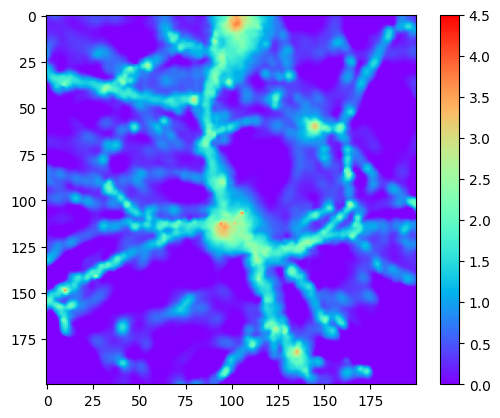

In [3]:
import numpy as np

import ipyvolume as ipv
import matplotlib.pyplot as plt
import plotly.graph_objects as go
arraydata = np.loadtxt("snap_128_density_grid.dat",skiprows=22)
print (arraydata.shape)
data= arraydata.reshape((200,200,200))


data =  data*1e10


# Calcula las estadísticas
media = np.mean(data)
varianza = np.var(data)
maximo = np.max(data)
minimo = np.min(data)

# Imprime los resultados
print(f"Media: {media:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Máximo: {maximo:.2f}")
print(f"Mínimo: {minimo:.2f}")


#print(data.shape)
#print(data.max())
#print(data.min())
data = np.log10(data)
#data = data /data.max()
print(data.max())
print(data.min())

densmin = 0
densmax = 4.5


# Crear un array 3D de ejemplo
slice_2dd = data[:,0,:]
# Mostrar la slice utilizando Matplotlib
plt.imshow(slice_2dd,cmap='rainbow',vmin=densmin, vmax=densmax)
plt.colorbar()
plt.show()


## **Recorre todas las slices y graba cada frame en  fichero**

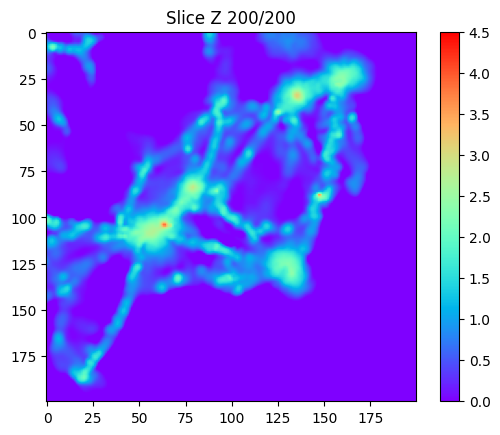

In [2]:
# Recorrer todas las slices y visualizarlas 
folder = "/Users/gustavo/DATA/PLAYGROUND/spashl_voxel"
slice_2d = data[:, :, 0]
plt.imshow(slice_2d, cmap='rainbow',vmin=densmin, vmax=densmax)
plt.title(f"Slice Z  1 /{data.shape[2]}") 
plt.colorbar()
plt.savefig(folder + "/filez%02d.png" % 0)

for z in range(1,data.shape[2],2):
    # Obtener la slice 2D en el eje z actual
    slice_2d = data[:, :, z]
    # Mostrar la slice utilizando imshow()
    plt.imshow(slice_2d, cmap='rainbow',vmin=densmin, vmax=densmax)
    plt.title(f"Slice Z {z+1}/{data.shape[2]}")  # Título con información de la slice actual
    #plt.colorbar()
    plt.savefig(folder + "/filez%02d.png" % z)
    
plt.show()

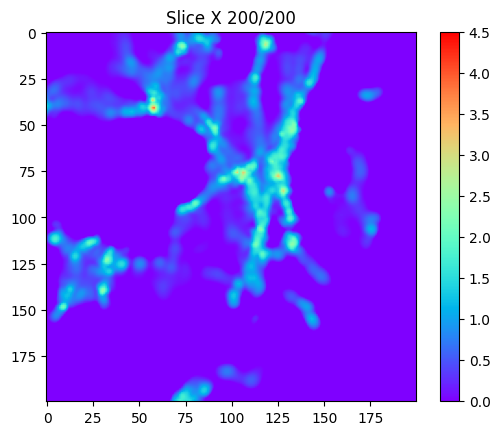

In [4]:
#  Recorrer todas las slices y visualizarlas 
folder = "/Users/gustavo/DATA/PLAYGROUND/spashl_voxel"
slice_2d = data[0, :, :]
plt.imshow(slice_2d, cmap='rainbow',vmin=densmin, vmax=densmax)
plt.title(f"Slice X  1 /{data.shape[0]}") 
plt.colorbar()
plt.savefig(folder + "/filex%02d.png" % 0)

for z in range(1,data.shape[2],2):
    # Obtener la slice 2D en el eje x actual
    slice_2d = data[z, :, :]
    # Mostrar la slice utilizando imshow()
    plt.imshow(slice_2d, cmap='rainbow',vmin=densmin, vmax=densmax)
    plt.title(f"Slice X {z+1}/{data.shape[2]}")  # Título con información de la slice actual
    #plt.colorbar()
    plt.savefig(folder + "/filex%02d.png" % z)
    
plt.show()

# **Read the gas density created by NGP**

[200 200 200]
(8000000,)
(200, 200, 200)
Voxsel= 2962.962962962963
Media: 46.97
Varianza: 348853.59
Máximo: 86603.92
Mínimo: 0.00


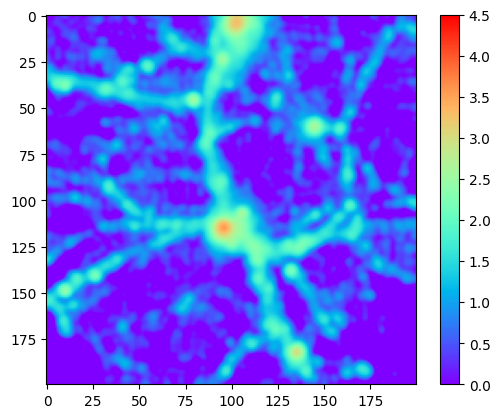

In [4]:
from scipy.io import FortranFile
from scipy.ndimage import gaussian_filter
fwhm_px = 4
sigma=fwhm_px/(2*np.sqrt(2*np.log(2)))

 
f = FortranFile('snap_128_gasgrid200.dat', 'r')
dim = f.read_ints(np.int32)
print (dim)

#array = f.read_reals(float)

#dataw= f.read_record('f4').reshape(200, 200, 200, order='F')

dataw= f.read_record('f4')
print (dataw.shape)

dataw= dataw.reshape((200,200,200))

print (dataw.shape)

voxel = 1e10 /((30000/200)**3)
print ("Voxsel=",voxel)

dataw = dataw *voxel

#smooth the dens field 
dataw = gaussian_filter(dataw,sigma) 

# Calcula las estadísticas
media = np.mean(dataw)
varianza = np.var(dataw)
maximo = np.max(dataw)
minimo = np.min(dataw)

# Imprime los resultados
print(f"Media: {media:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Máximo: {maximo:.2f}")
print(f"Mínimo: {minimo:.2f}")

dataw = np.log10(dataw+1e-30)


# Crear un array 3D de ejemplo
slice_2dd = dataw[:,0,:]
# Mostrar la slice utilizando Matplotlib
plt.imshow(slice_2dd,cmap='rainbow',vmin=densmin, vmax=densmax)
plt.colorbar()
plt.show()


## Recorrer todas las slices y visualizarlas

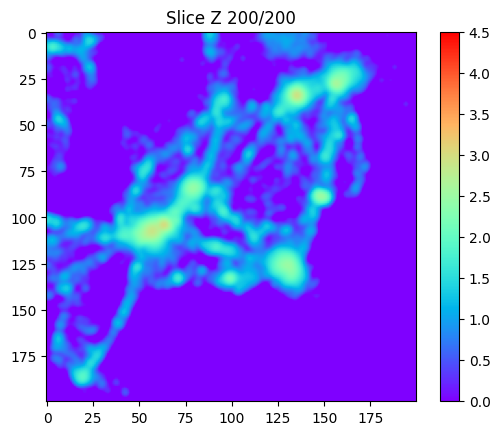

In [5]:
# Recorrer todas las slices y visualizarlas 
folder = "/Users/gustavo/DATA/PLAYGROUND/spashl_voxel"
slice_2d = dataw[:, :, 0]
plt.imshow(slice_2d, cmap='rainbow',vmin=densmin, vmax=densmax)
plt.title(f"Slice Z  1 /{data.shape[2]}") 
plt.colorbar()
plt.savefig(folder + "/file_smooth4_z%02d.png" % 0)

for z in range(1,data.shape[2],2):
    # Obtener la slice 2D en el eje z actual
    slice_2d = dataw[:, :, z]
    # Mostrar la slice utilizando imshow()
    plt.imshow(slice_2d, cmap='rainbow',vmin=densmin, vmax=densmax)
    plt.title(f"Slice Z {z+1}/{data.shape[2]}")  # Título con información de la slice actual
    #plt.colorbar()
    plt.savefig(folder + "/file_smooth_z%02d.png" % z)
    
plt.show()